# 3.3 Milvus 在 AI Agent 中的应用 [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/richzw/milvus-workshop/blob/main/ch3/ch3_3.ipynb) 

在本节中，我们将探讨 AI Agent 的基本架构，Milvus 如何在其中扮演关键角色，并通过一个使用 LangGraph 和 Milvus 构建的 Agent 案例来演示其实际应用。

## AI Agent 架构概览

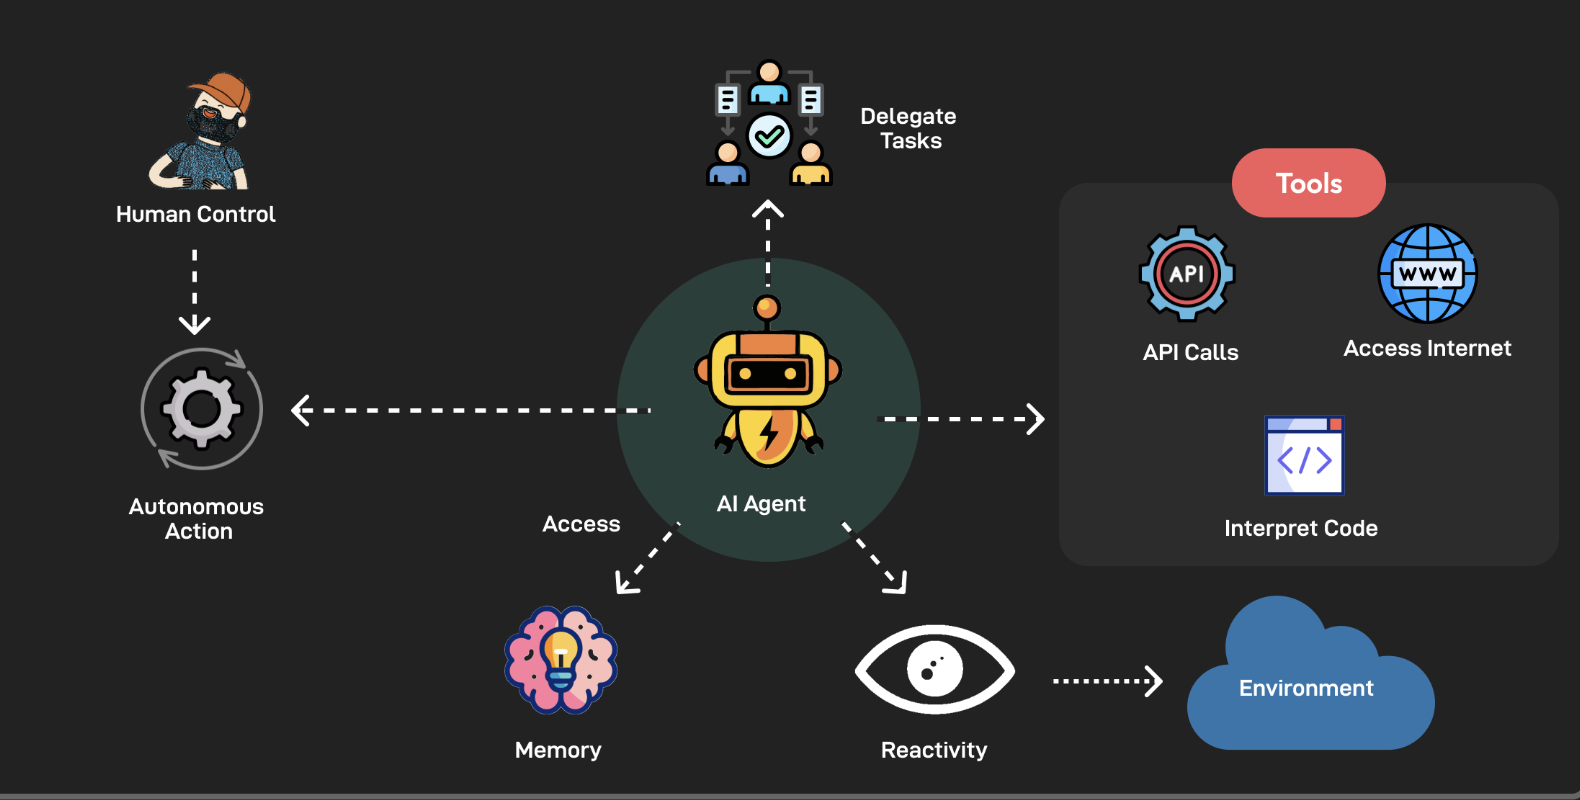

一个典型的 AI Agent 通常由以下几个核心组件构成：

*   **Planning (规划):**
    *   **目标设定与分解:** Agent 首先需要理解用户的最终目标，并将其分解为一系列可执行的子任务或步骤。
    *   **策略选择:** 对于每个子任务，Agent 可能有多种执行方式或工具可以选择。规划模块负责选择最优策略。
    *   **执行监控与调整:** 在任务执行过程中，Agent 需要监控进展，并根据实际情况调整计划。例如，如果一个步骤失败，它可能需要重新规划或尝试其他方法。

*   **Memory (记忆):**
    *   **短期记忆 (Short-term Memory):** 用于存储当前对话的上下文、最近的交互信息或正在处理的任务的中间状态。这对于保持对话连贯性和多轮交互至关重要。
    *   **长期记忆 (Long-term Memory):** 用于存储 Agent 学习到的知识、过去的经验、用户偏好、成功的解决方案等。这使得 Agent 能够从过去的交互中学习，并随着时间的推移变得更加智能和个性化。

*   **Tools (工具):**
    *   **功能调用:** Agent 可以使用各种工具来完成特定任务。这些工具可以是：
        *   **API 调用:** 例如，搜索天气、查询数据库、发送邮件等。
        *   **代码执行:** 执行 Python 脚本或其他代码片段来处理数据或执行复杂计算。
        *   **知识库查询:** 从外部知识库（如 Milvus）中检索信息。
    *   **工具选择与使用:** Agent 的规划模块需要决定何时使用哪个工具，以及如何将工具的输出整合到其任务执行流程中。

这种架构使得 AI Agent 能够像一个智能助手一样，理解任务、制定计划、利用可用资源（工具和记忆），并最终完成目标。

## Milvus 在 Agent 中的角色

Milvus 作为一个高性能的向量数据库，在 AI Agent 中可以扮演两个至关重要的角色：

### 1. External Knowledge Base (外部知识库)

*   **功能:** Agent 经常需要访问和查询大量的外部信息来回答问题或完成任务。这些信息可以是非结构化的文本数据、文档、网页内容等。
*   **Milvus 的作用:**
    *   **存储:** 将这些外部信息通过 Embedding 模型转化为向量，并存储在 Milvus 中。
    *   **检索:** 当 Agent 需要相关信息时，它可以将用户的查询或其内部思考也转化为向量，然后在 Milvus 中进行高效的相似性搜索，快速找到最相关的知识片段。
    *   **类似 RAG:** 这种模式与检索增强生成 (Retrieval Augmented Generation, RAG) 非常相似。Milvus 作为 RAG 架构中的核心检索引擎，为 Agent 提供准确、相关的上下文信息，从而提升其回答的质量和事实性。

### 2. Memory (记忆)

*   **功能:** Agent 需要记住过去的交互、学习到的经验、成功的规划步骤等，以便在未来的任务中更好地执行。
*   **Milvus 的作用:**
    *   **存储对话历史:** Agent 的对话历史（用户提问、Agent 回答、中间思考）可以被向量化并存储在 Milvus 中。
    *   **存储学习经验:** Agent 在执行任务过程中学习到的成功策略、失败教训、用户偏好等，都可以转化为向量形式存储起来。
    *   **存储规划步骤:** 复杂的任务规划过程中的中间步骤和决策逻辑，也可以向量化后存入 Milvus，供未来相似任务参考。
    *   **快速召回:** 当 Agent 开始新的对话或任务时，它可以查询 Milvus 中存储的记忆向量，找到与当前情境最相似的历史记录或经验，从而快速回忆相关信息，提供更连贯、个性化和高效的服务。

通过将信息向量化并存储在 Milvus 中，Agent 可以利用语义相似性来检索知识和记忆，而不仅仅是关键词匹配，这使得 Agent 的信息获取和利用能力大大增强。

## 案例演示/代码讲解：一个使用 LangGraph 和 Milvus 的 Agent

接下来，我们将通过一个简化的案例，演示一个 AI Agent 如何利用 Milvus 作为外部知识库。我们将使用 LangGraph 来构建 Agent 的控制流程。

**核心流程：**

1.  **用户提问:** 用户向 Agent 提出一个问题。
2.  **Agent 规划 (识别需求):** Agent (通过 LLM) 分析问题，判断是否需要从外部知识库 (Milvus) 中获取信息。
3.  **查询向量化:** 如果需要，Agent 将用户的查询或其衍生的搜索关键词转化为向量。
4.  **Milvus 搜索:** Agent 使用该向量在 Milvus 中搜索相关的知识。
5.  **获取信息:** Milvus 返回最相关的文档片段。
6.  **Agent 整合信息并响应:** Agent 结合从 Milvus 获取的信息和自身的推理能力，生成最终答案给用户。

**同时，我们也可以构想 Agent 如何存储对话片段：**

1.  **对话结束/片段记录:** 在对话的某个节点（例如，一轮问答结束），Agent 将该对话片段（用户问题、Agent 回答、可能还有一些上下文元数据）进行向量化。
2.  **存入 Milvus 记忆库:** 将这个向量及对应的文本内容存入一个专门的 Milvus 集合（或特定分区）作为长期记忆。
3.  **新对话开始时召回:** 当新的对话开始，或用户提出一个模糊的问题时，Agent 可以将当前输入向量化，在 Milvus 记忆库中搜索相似的历史对话，从而快速理解用户意图或提供更个性化的回应。

**下面我们聚焦于使用 Milvus 作为外部知识库的 LangGraph Agent 实现。**

我们将简化上述参考链接中的 GraphRAG 概念，构建一个更直接的 Agent，它有一个工具是查询 Milvus。

### 1. 准备环境

%pip install pymilvus langchain==0.3.25 langgraph==0.4.7 langchain_openai==0.3.18 langchain_community==0.0.38 langchain-core==0.3.61 

In [27]:
# Import necessary libraries
import os
import uuid
from typing import TypedDict, Annotated, List, Union
import operator

from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage, ToolMessage
from langchain_core.tools import tool
from langchain_community.vectorstores import Milvus
from langgraph.graph import StateGraph, END
# from langgraph.prebuilt import ToolExecutor,  ToolInvocation
from langgraph.prebuilt import create_react_agent

# Milvus/Pymilvus related
from pymilvus import connections, utility, CollectionSchema, FieldSchema, DataType, Collection

# --- Configuration ---
# os.environ["OPENAI_API_KEY"] = "sk-YOUR_OPENAI_API_KEY"
if "OPENAI_API_KEY" not in os.environ:
    print("错误：请设置 OPENAI_API_KEY 环境变量。")
    # exit() # 在notebook中，我们可能不希望直接退出，而是提示用户

# Milvus Connection Parameters
MILVUS_HOST = "localhost" # 或者您的 Milvus 服务地址
MILVUS_PORT = "19530"     # Milvus Standalone/Cluster 默认端口
MILVUS_COLLECTION_NAME = "ai_agent_knowledge_base"
MILVUS_EMBEDDING_DIM = 1536 # OpenAI ada-002 embeddings
ID_FIELD_NAME = "doc_id"
TEXT_FIELD_NAME = "text_content"
VECTOR_FIELD_NAME = "embedding"

# LLM and Embeddings
llm = ChatOpenAI(model="gpt-4.1", temperature=0)
embeddings_model = OpenAIEmbeddings(model="text-embedding-ada-002")

print("配置加载完毕。")

配置加载完毕。


In [29]:
# Milvus Setup and Helper Functions

def connect_to_milvus():
    """建立与 Milvus 的连接"""
    try:
        connections.connect(host=MILVUS_HOST, port=MILVUS_PORT)
        print(f"成功连接到 Milvus: {MILVUS_HOST}:{MILVUS_PORT}")
    except Exception as e:
        print(f"连接 Milvus 失败: {e}")
        raise

def create_milvus_collection_if_not_exists():
    """如果集合不存在，则创建它"""
    connect_to_milvus() # 确保连接
    if utility.has_collection(MILVUS_COLLECTION_NAME):
        print(f"集合 '{MILVUS_COLLECTION_NAME}' 已存在.")
        utility.drop_collection(collection_name=MILVUS_COLLECTION_NAME)

    field_id = FieldSchema(name=ID_FIELD_NAME, dtype=DataType.VARCHAR, is_primary=True, max_length=36)
    field_text = FieldSchema(name=TEXT_FIELD_NAME, dtype=DataType.VARCHAR, max_length=65535) # 存储原始文本
    field_embedding = FieldSchema(name=VECTOR_FIELD_NAME, dtype=DataType.FLOAT_VECTOR, dim=MILVUS_EMBEDDING_DIM)

    schema = CollectionSchema(
        fields=[field_id, field_text, field_embedding],
        description="AI Agent Knowledge Base collection",
        enable_dynamic_field=False # 如果需要额外元数据且不想预定义，可以设为True
    )
    collection = Collection(MILVUS_COLLECTION_NAME, schema=schema)
    print(f"集合 '{MILVUS_COLLECTION_NAME}' 创建成功.")

    # 为向量字段创建索引 (IVF_FLAT 是一个常用选择)
    index_params = {
        "metric_type": "L2", # 或 "IP" (Inner Product)
        "index_type": "IVF_FLAT",
        "params": {"nlist": 128},
    }
    collection.create_index(field_name=VECTOR_FIELD_NAME, index_params=index_params)
    print(f"为字段 '{VECTOR_FIELD_NAME}' 创建索引成功.")
    collection.load()
    print(f"集合 '{MILVUS_COLLECTION_NAME}' 已加载.")
    return collection

def insert_data_to_milvus(collection: Collection, texts: List[str]):
    """将文本数据向量化并插入 Milvus"""
    if not texts:
        print("没有数据需要插入。")
        return

    print(f"正在为 {len(texts)} 条文本生成向量...")
    vectors = embeddings_model.embed_documents(texts)
    print("向量生成完毕。")

    # 准备插入数据
    data_to_insert = []
    for i, text_content in enumerate(texts):
        data_to_insert.append({
            ID_FIELD_NAME: str(uuid.uuid4()),
            TEXT_FIELD_NAME: text_content,
            VECTOR_FIELD_NAME: vectors[i]
        })

    print(f"正在向 Milvus 集合 '{collection.name}' 插入 {len(data_to_insert)} 条数据...")
    insert_result = collection.insert(data_to_insert)
    collection.flush() # 确保数据持久化
    print(f"数据插入成功. 影响行数: {insert_result.insert_count}")
    print(f"当前集合实体数量: {collection.num_entities}")


# 执行 Milvus 初始化
try:
    knowledge_collection = create_milvus_collection_if_not_exists()

    # 准备一些示例知识数据 (仅在首次运行时或需要时插入)
    # 为避免重复插入，可以检查集合是否为空
    if knowledge_collection.num_entities == 0:
        print("知识库为空，准备插入示例数据...")
        sample_knowledge = [
            "Milvus 是一款开源的向量数据库，专为大规模向量相似性搜索和分析而设计。",
            "AI Agent 可以利用 Milvus 作为其长期记忆存储和外部知识库。",
            "LangGraph 是一个用于构建有状态、多参与者应用程序的库，特别适合构建复杂的 AI Agent。",
            "向量数据库通过将数据转换为向量嵌入，并使用专门的索引进行高效的相似性搜索。",
            "RAG (Retrieval Augmented Generation) 是一种结合了检索系统和生成模型的AI技术，可以提高生成内容的准确性和相关性。",
            "太阳是太阳系的中心天体，其核心温度高达1500万摄氏度。",
            "Python 是一种广泛使用的高级编程语言，以其简洁的语法和强大的库生态系统而闻名。"
        ]
        insert_data_to_milvus(knowledge_collection, sample_knowledge)
    else:
        print(f"知识库中已有 {knowledge_collection.num_entities} 条数据，跳过示例数据插入。")

except Exception as e:
    print(f"Milvus 初始化或数据插入过程中发生错误: {e}")
    # 在Notebook中，我们可能不希望程序因Milvus连接问题而完全停止后续单元格的执行
    # 但后续依赖Milvus的单元格可能会失败
    knowledge_collection = None # 标记为None，以便后续检查

成功连接到 Milvus: localhost:19530
集合 'ai_agent_knowledge_base' 已存在.
集合 'ai_agent_knowledge_base' 创建成功.
为字段 'embedding' 创建索引成功.
集合 'ai_agent_knowledge_base' 已加载.
知识库为空，准备插入示例数据...
正在为 7 条文本生成向量...
向量生成完毕。
正在向 Milvus 集合 'ai_agent_knowledge_base' 插入 7 条数据...
数据插入成功. 影响行数: 7
当前集合实体数量: 7


In [30]:
from typing import List, TypedDict, Annotated
import operator
from langgraph.graph import StateGraph, END
from langchain_core.tools import tool
from langchain_core.messages import BaseMessage, ToolMessage
from langchain_core.runnables import RunnableLambda
from langchain_core.utils.function_calling import convert_to_openai_tool

# 1. Define Tools
@tool
def search_milvus_knowledge_base(query: str) -> str:
    """
    Search the Milvus knowledge base for information relevant to the query.
    The input should be a clear and specific question or search keywords.
    """
    if not knowledge_collection:
        return "Milvus knowledge base is not available."
    print(f"\n[Tool Call: search_milvus_knowledge_base] Query: {query}")
    query_vector = embeddings_model.embed_query(query)
    
    search_params = {
        "metric_type": "L2",
        "params": {"nprobe": 10},  # Adjust nprobe based on index type and data size
    }
    
    # Perform the search
    results = knowledge_collection.search(
        data=[query_vector],
        anns_field=VECTOR_FIELD_NAME,
        param=search_params,
        limit=3,  # Return top 3 relevant results
        expr=None,  # Optional filter, e.g., "doc_type == 'faq'"
        output_fields=[TEXT_FIELD_NAME]  # Retrieve original text content
    )
    
    context = ""
    if results and results[0]:
        context_docs = [hit.entity.get(TEXT_FIELD_NAME) for hit in results[0]]
        context = "\n".join(context_docs)
        print(f"[Tool Result] Found context: {context[:200]}...")
    else:
        print("[Tool Result] No relevant context found in Milvus.")
        context = "No relevant information found in the knowledge base."
    return context

# Define the tools list
tools = [search_milvus_knowledge_base]

# 2. Define Agent State
class AgentState(TypedDict):
    messages: Annotated[List[BaseMessage], operator.add]  # Accumulate messages

# 3. Define Nodes
def agent_node(state: AgentState) -> dict:
    """
    Agent node: Decides the next action (call a tool or respond directly).
    """
    print("\n[Node: Agent]")
    # Bind tools to the LLM to make it aware of available tools
    bound_llm = llm.bind_tools(tools)
    response = bound_llm.invoke(state["messages"])
    
    print(f"[Agent Decision] Response: {response.content}, Tool Calls: {response.tool_calls}")
    return {"messages": [response]}

def tool_node(state: AgentState) -> dict:
    """
    Tool node: Executes tool calls requested by the agent.
    """
    print("\n[Node: Tool Executor]")
    last_message = state["messages"][-1]
    
    if not hasattr(last_message, "tool_calls") or not last_message.tool_calls:
        print("[Tool Executor] No tool calls found in the last message.")
        return {"messages": []}
    
    tool_messages = []
    for tool_call in last_message.tool_calls:
        tool_name = tool_call["name"]
        tool_input = tool_call["args"]
        
        # Find the tool by name
        tool = next((t for t in tools if t.name == tool_name), None)
        if not tool:
            tool_messages.append(
                ToolMessage(
                    content=f"Error: Tool {tool_name} not found.",
                    tool_call_id=tool_call["id"]
                )
            )
            continue
        
        try:
            # Execute the tool
            result = tool.invoke(tool_input)
            tool_messages.append(
                ToolMessage(
                    content=str(result),
                    tool_call_id=tool_call["id"]
                )
            )
        except Exception as e:
            tool_messages.append(
                ToolMessage(
                    content=f"Error executing tool {tool_name}: {str(e)}",
                    tool_call_id=tool_call["id"]
                )
            )
    
    print(f"[Tool Executor] Executed tools, results: {tool_messages}")
    return {"messages": tool_messages}

# 4. Define Conditional Edges
def should_continue(state: AgentState) -> str:
    """
    Determines whether to continue to the tools node or end the workflow.
    """
    print("\n[Edge: should_continue]")
    last_message = state["messages"][-1]
    if hasattr(last_message, "tool_calls") and last_message.tool_calls:
        print("[Edge Decision] Continue to 'tools'")
        return "tools"
    print("[Edge Decision] End")
    return END

# 5. Construct the Graph
workflow = StateGraph(AgentState)

# Add nodes
workflow.add_node("agent", RunnableLambda(agent_node))
workflow.add_node("tools", RunnableLambda(tool_node))

# Set entry point
workflow.set_entry_point("agent")

# Add conditional edges
workflow.add_conditional_edges(
    "agent",
    should_continue,
    {
        "tools": "tools",
        END: END
    }
)

# Add edge from tools back to agent
workflow.add_edge("tools", "agent")

# Compile the graph
app = workflow.compile()
print("\nLangGraph App compiled successfully!")




LangGraph App compiled successfully!


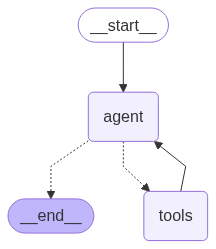

In [31]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [32]:
# Run the Agent and Interact

if "OPENAI_API_KEY" not in os.environ or not knowledge_collection:
    print("无法运行 Agent：请确保 OpenAI API 密钥已设置，并且 Milvus 连接和集合初始化成功。")
else:
    print("Agent 已准备就绪。开始提问吧！(输入 'exit' 退出)")
    print("-" * 30)

    # 演示 Agent 使用 Milvus 作为外部知识库
    print("\n--- 案例1: Agent 利用 Milvus 查找信息 ---")
    query1 = "Milvus 是什么?"
    print(f"User: {query1}")
    inputs = {"messages": [HumanMessage(content=query1)]}
    
    # 使用 stream 方法逐步查看执行过程
    for event in app.stream(inputs):
        for key, value in event.items():
            print(f"--- Event for Node: {key} ---")
            if "messages" in value:
                # 打印最新消息的内容
                latest_message = value["messages"][-1]
                if isinstance(latest_message, AIMessage):
                    print(f"AI: {latest_message.content}")
                    if latest_message.tool_calls:
                        print(f"AI requests tool call: {latest_message.tool_calls}")
                elif isinstance(latest_message, ToolMessage):
                    print(f"Tool Result ({latest_message.tool_call_id}): {latest_message.content}")
                else:
                    print(f"Message ({type(latest_message).__name__}): {latest_message.content}")
        print("-" * 10)
    
    print("\n--- 案例2: Agent 回答一个不需要查知识库的问题 (可能直接回答或拒绝) ---")
    query2 = "你好吗？"
    print(f"User: {query2}")
    inputs = {"messages": [HumanMessage(content=query2)]}
    # 获取最终结果
    final_response = app.invoke(inputs)
    if final_response and "messages" in final_response and final_response["messages"]:
        print(f"AI: {final_response['messages'][-1].content}")
    else:
        print("AI 未能生成回复。")

    # 演示 Agent 存储对话片段向量 (概念性，实际存储逻辑需要更完善)
    # 假设 query1 和其最终回复是一个需要记忆的片段
    if final_response and "messages" in final_response: # 使用上一个交互的结果
        print("\n--- 概念演示: 存储对话到 Milvus (作为记忆) ---")
        # 假设我们想要将用户的问题和Agent的最终回答作为一个记忆单元
        # 这里的 final_response['messages'] 可能包含整个对话历史
        # 我们通常取最后的用户问题和AI回答对
        
        # 找到 query1 对应的最终 AIMessage
        # 这是一个简化的查找，实际中可能需要更复杂的逻辑来配对问答
        q1_final_answer = ""
        # 假设 app.invoke 返回的 messages 列表的最后一个是最终答案
        if final_response['messages'] and isinstance(final_response['messages'][-1], AIMessage):
             q1_final_answer = final_response['messages'][-1].content # 取决于上一个 invoke 的内容
        
        # 如果 query1 导致了工具调用，我们可能需要从 stream 中找到它的最终回答
        # 为了简化，我们直接使用上面交互中打印的最终回答
        # 真实场景下，我们会捕获 app.invoke(inputs1) 的最终 AIMessage

        # 假设我们已经有了 query1 和 agent_final_answer_to_query1
        # 这里我们手动设置一个示例，因为上面app.invoke(inputs)的最终结果是针对query2的
        # 如果要精确获取query1的最终回答，需要重新运行app.invoke针对query1
        # 或者从 app.stream 的事件中提取
        
        # 为了演示，我们假设第一个问题"Milvus是什么"的最终答案是 "Milvus是一个开源的向量数据库..." (由LLM结合搜索结果生成)
        # 实际上，这个答案会在 stream 的某个 AIMessage 中出现
        # 这里我们模拟一下，因为直接从上面的 stream 中捕获最终答案有点复杂
        # 理想情况下，我们会有一个明确的 "final_answer" 状态或消息类型
        
        # 假设我们通过某种方式获取到了 query1 的最终AI回答
        simulated_final_answer_to_query1 = "Milvus 是一款先进的开源向量数据库，非常适合AI应用中的大规模相似性搜索。它能帮助Agent快速从大量文档中找到相关信息。" # 这是一个模拟的最终回答

        if simulated_final_answer_to_query1:
            memory_text = f"用户问: {query1}\nAgent答: {simulated_final_answer_to_query1}"
            print(f"准备将以下对话片段存入记忆库:\n{memory_text}")
            
            # 为了避免与知识库冲突，可以存入不同的集合或使用分区
            # 这里简单演示存入同一个集合，实际应用中应分开
            try:
                # 为简化，我们假设有一个单独的记忆集合 memory_collection
                # memory_collection = create_milvus_collection_if_not_exists("ai_agent_memory", ...)
                # insert_data_to_milvus(memory_collection, [memory_text])
                # 由于我们这里只有一个集合，就直接插入到 knowledge_collection，并作说明
                print("注意: 实际应用中，对话记忆应存入专用集合或分区。此处为演示，插入当前知识库。")
                insert_data_to_milvus(knowledge_collection, [memory_text])
                print("对话片段已（概念性地）存入 Milvus 记忆库。")

                # 如何在新对话开始时搜索相似历史 -> 召回相关记忆
                new_user_query = "介绍一下向量数据库" # 一个新的，但与之前记忆相关的问题
                print(f"\n新用户查询: {new_user_query}")
                print("Agent (概念上) 将搜索 Milvus 记忆库以查找相似历史对话...")
                # 实际操作：
                # 1. new_user_query_vector = embeddings_model.embed_query(new_user_query)
                # 2. search memory_collection with new_user_query_vector
                # 3. retrieved_memories = results_from_memory_collection
                # 4. Agent 使用 retrieved_memories 作为上下文辅助当前对话
                # 这里我们用知识库搜索来模拟这个过程：
                retrieved_memories = search_milvus_knowledge_base(new_user_query)
                print(f"从Milvus中召回的（模拟的）相关记忆/知识:\n{retrieved_memories}")

            except Exception as e:
                print(f"存储或检索记忆时发生错误: {e}")
        else:
            print("未能获取到 query1 的最终回答，跳过记忆存储演示。")

Agent 已准备就绪。开始提问吧！(输入 'exit' 退出)
------------------------------

--- 案例1: Agent 利用 Milvus 查找信息 ---
User: Milvus 是什么?

[Node: Agent]
[Agent Decision] Response: Milvus 是一个开源的向量数据库（Vector Database），专为处理大规模向量数据的存储、检索和管理而设计。它广泛应用于人工智能、机器学习、推荐系统、图像检索、自然语言处理等领域，能够高效地进行相似性搜索（如最近邻搜索，ANN）。

**主要特点包括：**
- 支持高维向量的高效存储与检索
- 提供多种索引类型（如 IVF、HNSW、FLAT 等）以优化不同场景下的查询性能
- 支持分布式架构，能够横向扩展以处理海量数据
- 提供丰富的 API（如 Python、Java、RESTful 等）便于集成到各种应用中
- 与主流 AI 框架（如 TensorFlow、PyTorch）和数据平台（如 Apache Spark）兼容

**应用场景举例：**
- 图像/视频/音频的相似内容检索
- 文本语义搜索
- 推荐系统中的用户/物品向量检索
- 生物信息学中的基因序列比对

Milvus 由 Zilliz 公司主导开发，并已成为 LF AI & Data 基金会的孵化项目。, Tool Calls: []

[Edge: should_continue]
[Edge Decision] End
--- Event for Node: agent ---
AI: Milvus 是一个开源的向量数据库（Vector Database），专为处理大规模向量数据的存储、检索和管理而设计。它广泛应用于人工智能、机器学习、推荐系统、图像检索、自然语言处理等领域，能够高效地进行相似性搜索（如最近邻搜索，ANN）。

**主要特点包括：**
- 支持高维向量的高效存储与检索
- 提供多种索引类型（如 IVF、HNSW、FLAT 等）以优化不同场景下的查询性能
- 支持分布式架构，能够横向扩展以处理海量数据
- 提供丰富的 API（如 Python、Java、RESTful 等）便于集成到各种应用中
- 与主流 AI 框架（如 TensorFlow、PyTorc

## 讨论：Milvus 如何赋能 Agent 更智能地执行任务

Milvus 通过其强大的向量存储和检索能力，可以从多个方面赋能 AI Agent，使其更智能：

1.  **增强的知识获取与利用:**
    *   **海量知识管理:** Agent 可以接入存储在 Milvus 中的大规模、多样化的外部知识，不再局限于模型预训练数据。
    *   **语义理解:** 通过向量相似性搜索，Agent 能够理解查询的深层语义，而不是简单的关键词匹配，从而找到更相关的知识。
    *   **动态知识更新:** Milvus 中的知识库可以随时更新，Agent 可以即时获取最新的信息，保持知识的时效性。

2.  **更强大的记忆能力:**
    *   **长期记忆的实现:** Milvus 为 Agent 提供了存储和检索长期记忆（如对话历史、用户偏好、学习经验）的有效机制。
    *   **情境感知与个性化:** 通过检索相似的过去交互，Agent 可以更好地理解当前对话的上下文，提供更连贯和个性化的服务。例如，记住用户之前的选择或问题。
    *   **持续学习与改进:** Agent 可以将成功的交互模式或解决问题的策略向量化存储，未来遇到类似情况时可以快速借鉴，实现持续学习和性能提升。

3.  **提升任务执行效率与效果:**
    *   **快速信息检索:** Milvus 的高效检索能力确保 Agent 能够迅速找到所需信息，减少任务执行的延迟。
    *   **复杂问题解决:** 对于需要多方面知识的复杂问题，Agent 可以从 Milvus 中检索多个相关的知识片段，综合分析后给出答案。
    *   **减少幻觉:** 通过 RAG 模式，Agent 的回答基于从 Milvus 检索到的实际数据，可以显著减少“幻觉”现象，提高回答的准确性和可靠性。

4.  **支持更复杂的 Agent 行为:**
    *   **主动学习与探索:** Agent 可以将探索到的新知识、新环境信息向量化存入 Milvus，用于未来的规划和决策。
    *   **多 Agent 协作:** 多个 Agent 可以共享同一个 Milvus 实例作为知识或记忆中心，促进协作和知识共享。

总之，Milvus 为 AI Agent 提供了一个坚实的数据基础，使其能够更有效地存储、管理和利用信息，从而在理解、规划、学习和交互等各个方面表现得更加智能。

## Hands-on Exercise 3: 实操AI Agent Demo

**目标:** 体验并扩展我们刚刚构建的 AI Agent。

**任务:**

1.  **运行并理解 Agent:**
    *   确保你的 OpenAI API Key 已正确设置，并且 Milvus 服务正在运行。
    *   逐个执行上面的 Jupyter Notebook 单元格。
    *   观察 Agent 在处理不同类型问题时的行为：
        *   哪些问题触发了 `search_milvus_knowledge_base` 工具？
        *   Agent 如何利用从 Milvus 返回的信息来构建答案？
        *   Agent 如何处理不需要外部知识的问题？
    *   仔细阅读 `app.stream(inputs)` 的输出，理解 LangGraph 中节点的流转过程。

2.  **扩展知识库:**
    *   在 `Cell 3` (Milvus Setup and Helper Functions) 中，找到 `sample_knowledge` 列表。
    *   向该列表添加几条你自定义的知识条目（例如，关于某个特定技术、历史事件或你感兴趣的任何主题）。
        *   **重要:** 添加新知识后，你需要一种方式来重新运行 `insert_data_to_milvus` 函数。你可以：
            *   简单地删除 Milvus collection（如果只是测试），然后重新创建并插入所有数据：`utility.drop_collection(MILVUS_COLLECTION_NAME)`（请谨慎操作！）。
            *   或者，修改代码，使其只插入新的、尚未存在的条目（这更复杂，需要检查数据是否已存在）。
            *   对于本练习，最简单的方法是：如果 `knowledge_collection.num_entities > 0`，先 `utility.drop_collection(MILVUS_COLLECTION_NAME)`，然后再调用 `create_milvus_collection_if_not_exists()` 和 `insert_data_to_milvus()`。**请注意，这将删除所有现有数据。**
    *   重新运行相关的单元格以更新 Milvus 中的数据。
    *   向 Agent 提问，测试它是否能利用你新添加的知识。

3.  **(可选) 尝试不同的查询:**
    *   构造一些更复杂的查询，看看 Agent 如何响应。
    *   尝试一些模棱两可的查询，观察 Agent 是否会尝试澄清或依赖其内部知识。

4.  **(进阶可选) 添加一个新的简单工具:**
    *   例如，添加一个 `get_current_time` 工具，它不查询 Milvus，只是返回当前时间。
        ```python
        from datetime import datetime

        @tool
        def get_current_time(placeholder: str = "default") -> str: # Langchain tools often expect an input arg
            """Returns the current date and time."""
            print("\n[Tool Call: get_current_time]")
            return datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        ```
    *   将这个新工具添加到 `Cell 4` 的 `tools` 列表中: `tools = [search_milvus_knowledge_base, get_current_time]`。
    *   重新编译 `app = workflow.compile()`。
    *   向 Agent 提问，例如 "现在几点了？"，看看它是否会使用这个新工具。

**思考与记录:**

*   你认为 Milvus 在这个 Agent 中最大的价值是什么？
*   如果让你进一步改进这个 Agent，你会从哪些方面入手？（例如，更精细的记忆管理、更复杂的规划逻辑、更多的工具等）
